# 04_visualize_anchors

In [1]:
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def visualize(wh_in_mobilenet):
    stride = 32

    colors = [(255, 0, 0), (255, 255, 0), (0, 255, 0), (0, 0, 255), (0, 255, 255), (55, 0, 0),
              (255, 55, 0), (0, 55, 0), (0, 0, 25), (0, 255, 55)]

    anchor_path = dataset_disk + 'generated_anchors_mobilenet/'
    for i in range(1, 11):
        cv2.namedWindow('%d_anchors' % int(i))
        cv2.moveWindow('%d_anchors' % int(i), 100, 100)
        blank_image = np.zeros((wh_in_mobilenet[0], wh_in_mobilenet[1], 3), np.uint8)
        blank_image += 255
        anchor_txt = anchor_path + 'anchors_%d.txt' % int(i)
        anchors = []
        with open(anchor_txt, 'r') as f:
            for i, line in enumerate(f):
                line = line.rstrip('\n')
                anchor = line.split(', ')
                anchors.append(anchor)

        output_img = os.path.join(anchor_txt).replace('.txt', '.png')
        stride_h = 10
        stride_w = 3
        for i in range(len(anchors)):
            (w, h) = map(float, anchors[i])

            w = int(w * stride)
            h = int(h * stride)
            print(w, h)

            # make sure starting coordinates of anchors do not overlap each other
            offset_x = 10 + i * stride_w
            offset_y = 10 + i * stride_h

            cv2.rectangle(blank_image, (offset_x, offset_y), (offset_x + w, offset_y + h), colors[i])

#             cv2.imshow('%d_anchors' % int(i+1), blank_image)
            cv2.waitKey(1000)
            cv2.imwrite(output_img, blank_image)
        plt.imshow(blank_image)
        plt.title('%d_anchors' % int(i+1))
        plt.show()
        print('')

    print('Done!')

344 249


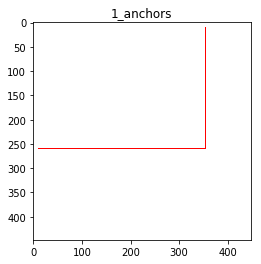


200 153
392 281


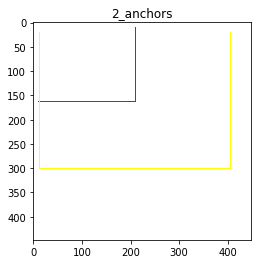


156 132
322 213
410 305


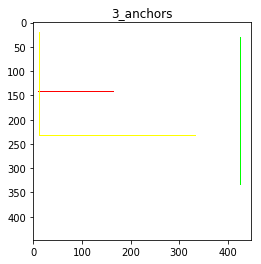


145 120
246 214
383 205
408 307


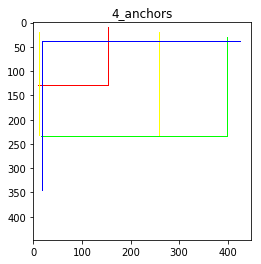


135 112
218 188
320 269
389 187
426 309


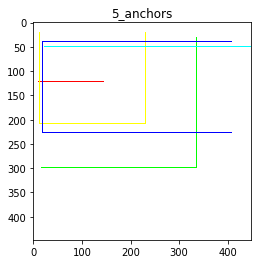


134 111
209 192
311 268
354 158
416 235
424 318


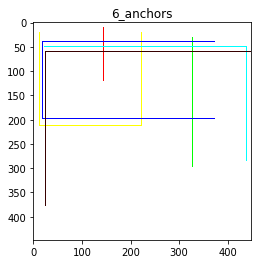


128 102
186 171
269 236
346 292
353 156
415 232
434 320


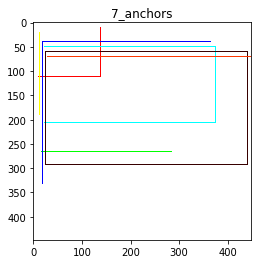


124 102
182 171
264 235
325 135
341 290
387 195
423 255
432 324


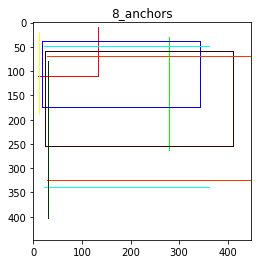


115 89
161 142
215 198
274 272
326 216
351 142
360 296
426 232
437 321


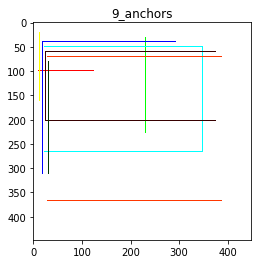


112 90
160 147
219 208
294 255
311 122
354 301
366 175
405 221
427 272
436 328


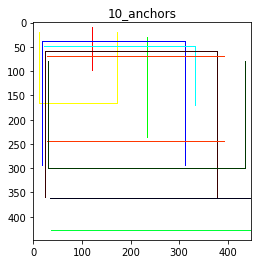


Done!


In [4]:
wn_in_mobilenet = [448, 448]
dataset_disk = '/Volumes/JS/UECFOOD100_448/'
visualize(wn_in_mobilenet)